In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score, zero_one_loss
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from plotly.offline import init_notebook_mode
from sklearn.feature_selection import f_classif

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [2]:
#data collection
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
# Data Cleaning Process

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
# Data Cleaning Process Continuation

print(df.shape)
null = df.isnull().sum()
print(null)

(2111, 17)
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
def check_duplicated(df):
    duplicated_total = df.duplicated().sum()
    while duplicated_total > 0:
        duplicated_rows = df[df.duplicated()]
        print(f"Number of duplicated value: {duplicated_total}")
        print(duplicated_rows)
        df = df.drop_duplicates()
        duplicated_total = df.duplicated().sum()
    return df

In [7]:
df = check_duplicated(df)
print(df.shape)

Number of duplicated value: 24
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
106  25.0  Female    1.57    55.0  Sometimes  yes   2.0  1.0  no    no   2.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
209  22.0  Female    1.69    65.0  Sometimes  yes   2.0  3.0  no    no   2.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
467  22.0    Male    1.74    75.0         no  yes   3.0  3.0  no    no   1.0   
496  18.0    Male    1.72    53.0  Sometimes  yes   2.0  3.0  no    no   2.0   
527  21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
659  21.0

In [8]:
df.loc[:, 'BMI'] = df['Weight'] / (df['Height'] ** 2)

In [9]:
for col in (df.select_dtypes(include=['object']).columns):
    print(col,":", df[col].unique())

Gender : ['Female' 'Male']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
FAVC : ['no' 'yes']
SCC : ['no' 'yes']
SMOKE : ['no' 'yes']
family_history_with_overweight : ['yes' 'no']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


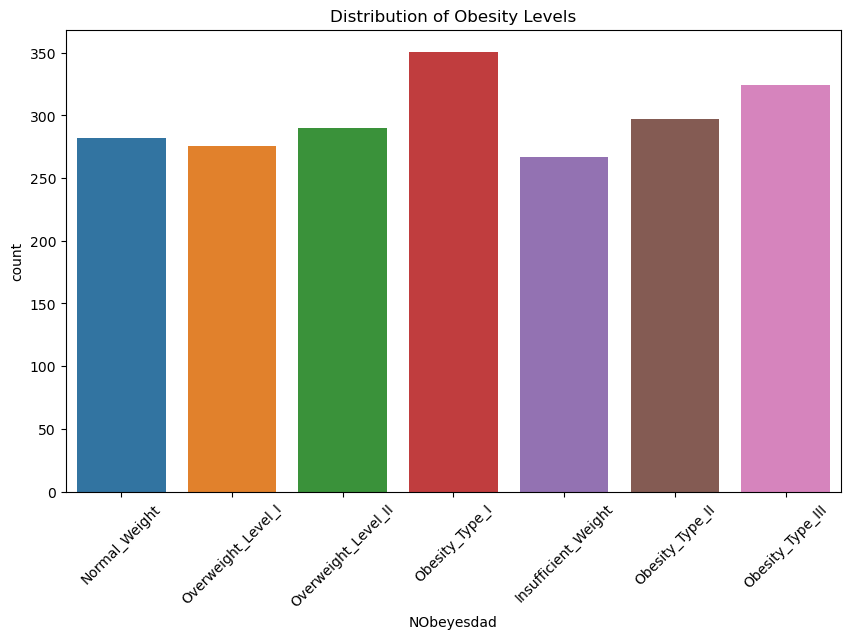

In [10]:
# The Distribution of Obesity Levels Visualization

plt.figure(figsize = (10, 6))
sns.countplot(x = 'NObeyesdad', data = df,  hue = 'NObeyesdad', palette = 'tab10')
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation = 45)
plt.show()

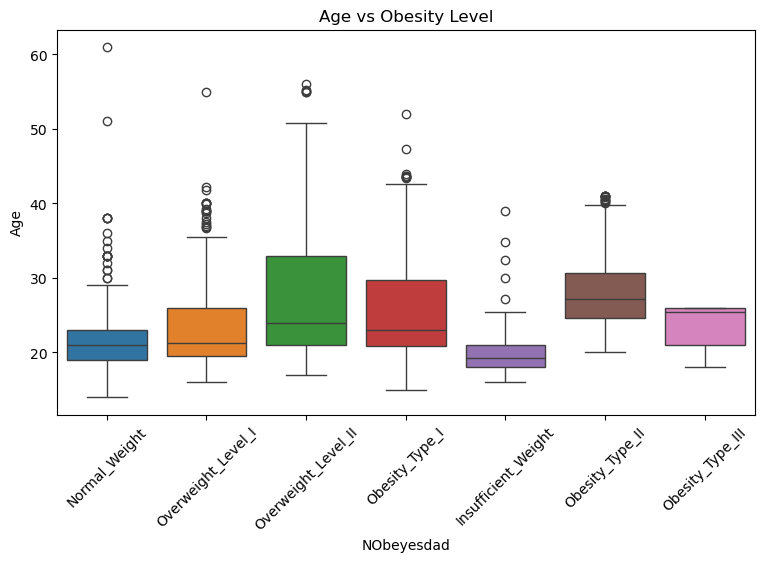

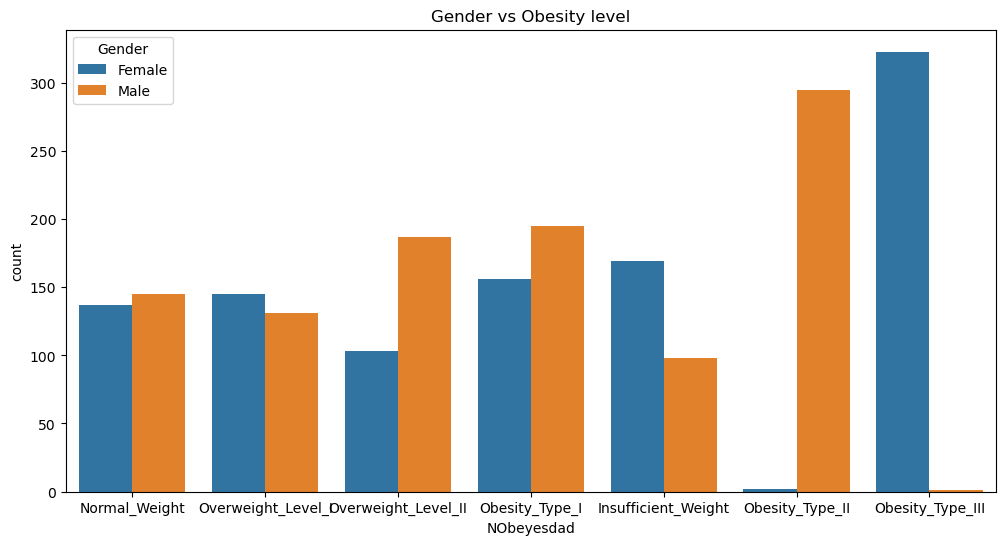

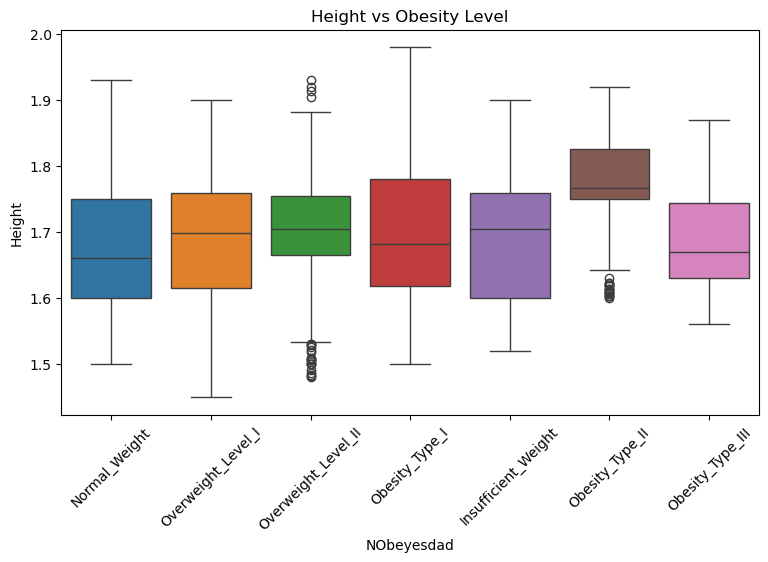

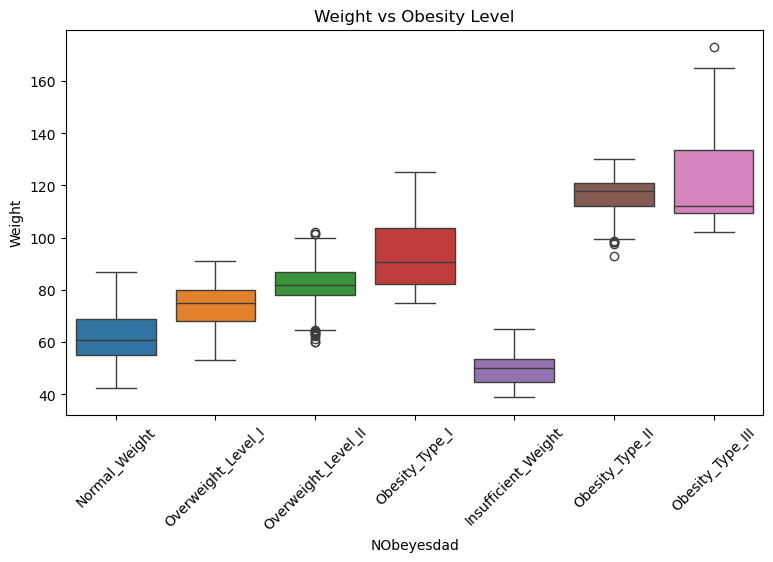

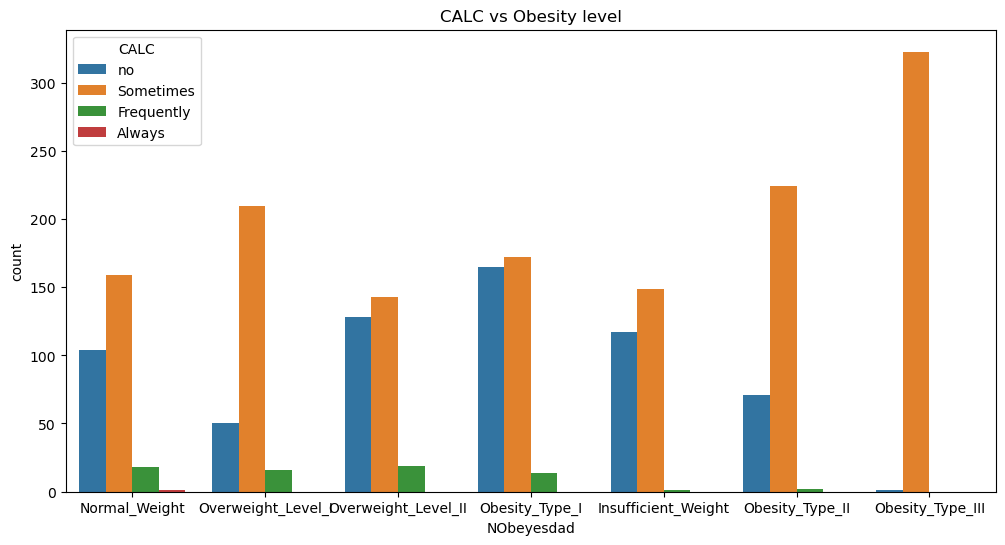

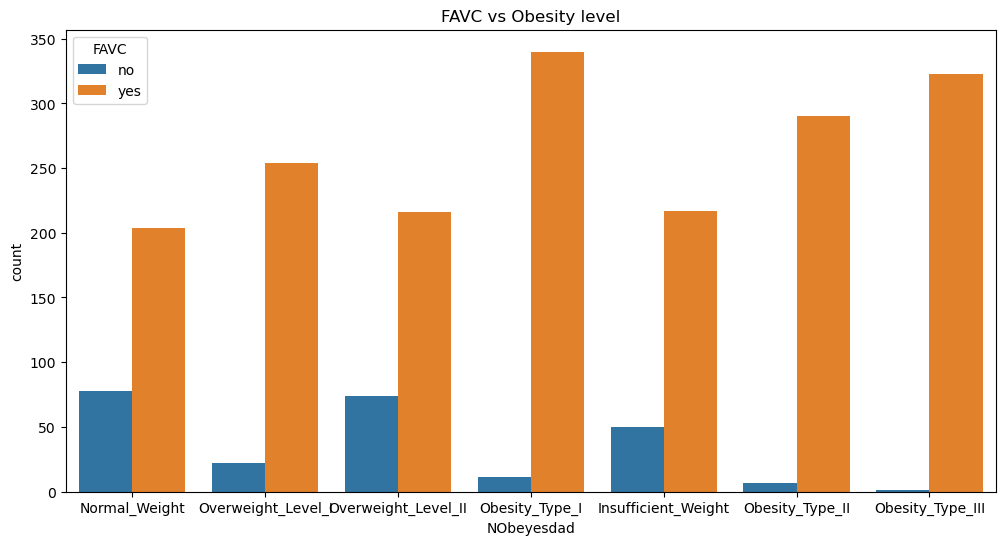

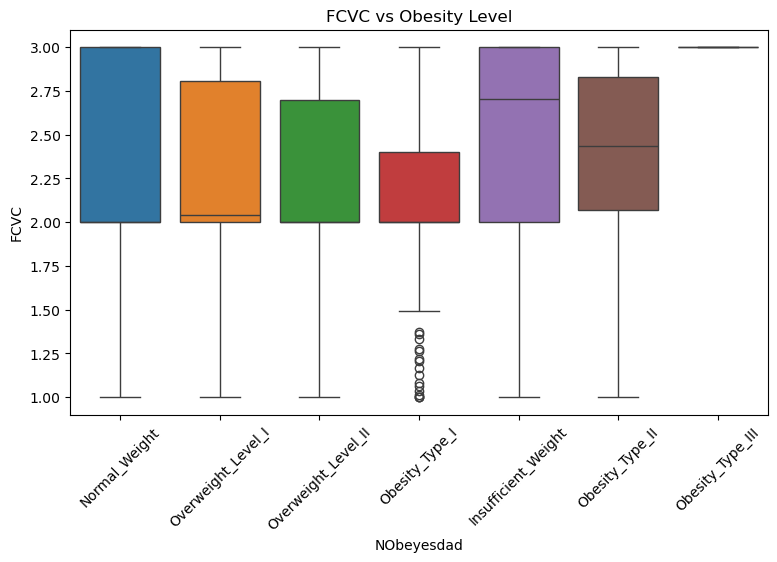

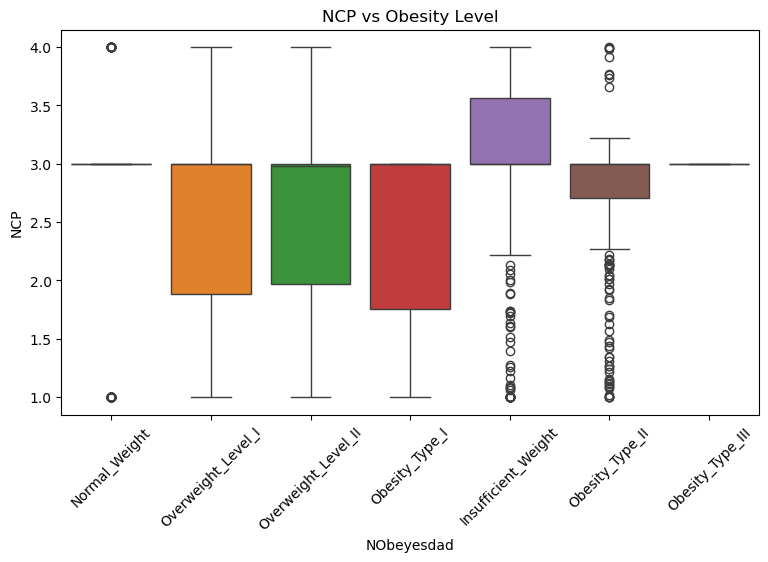

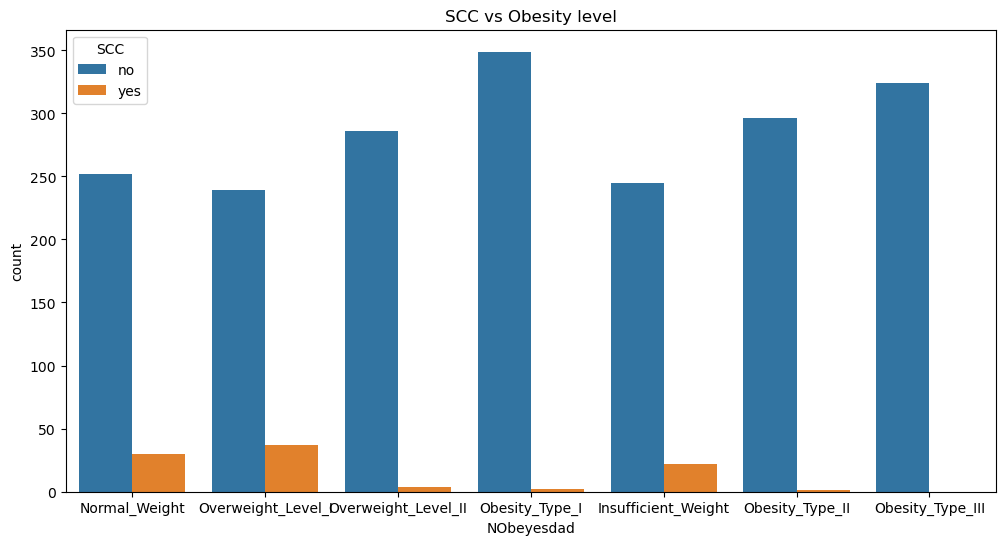

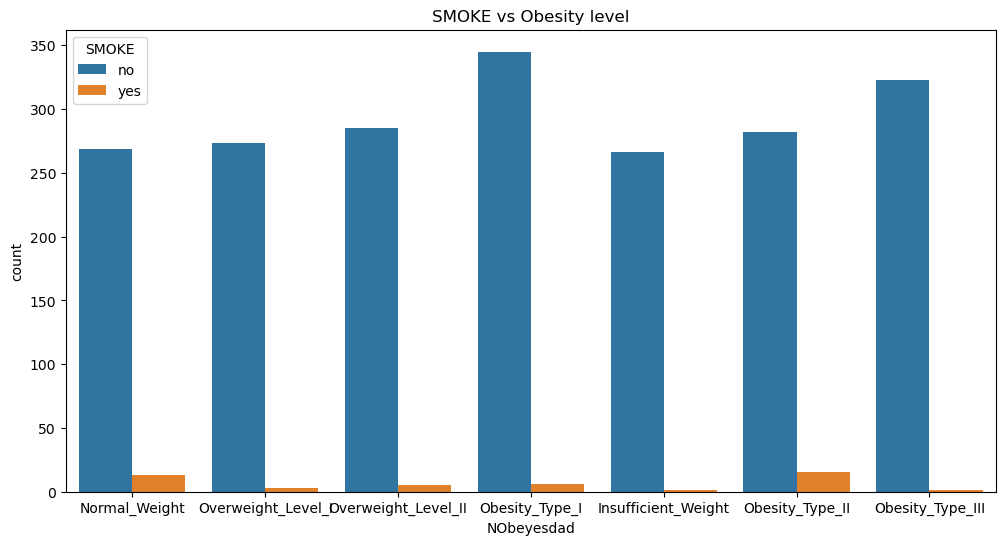

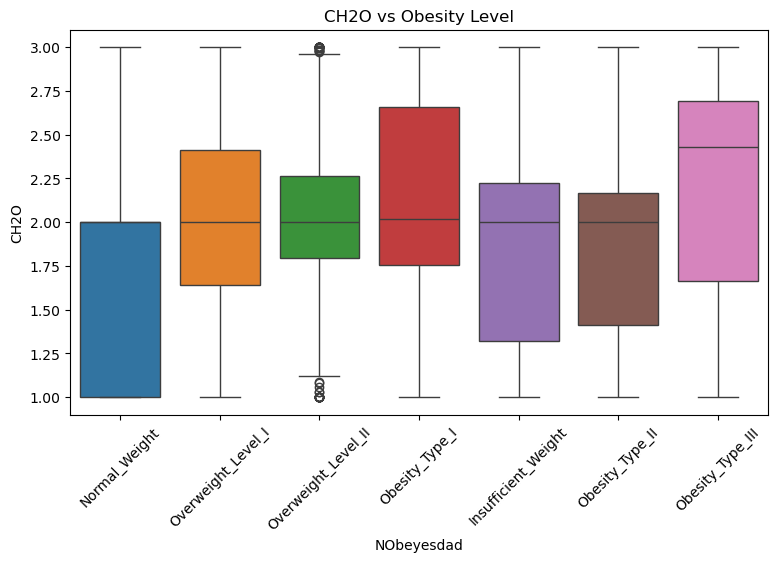

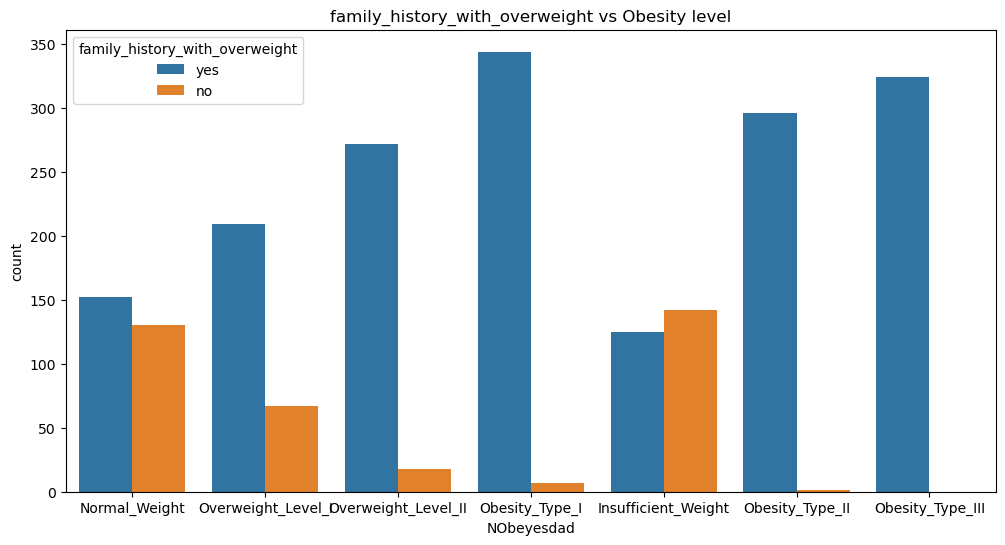

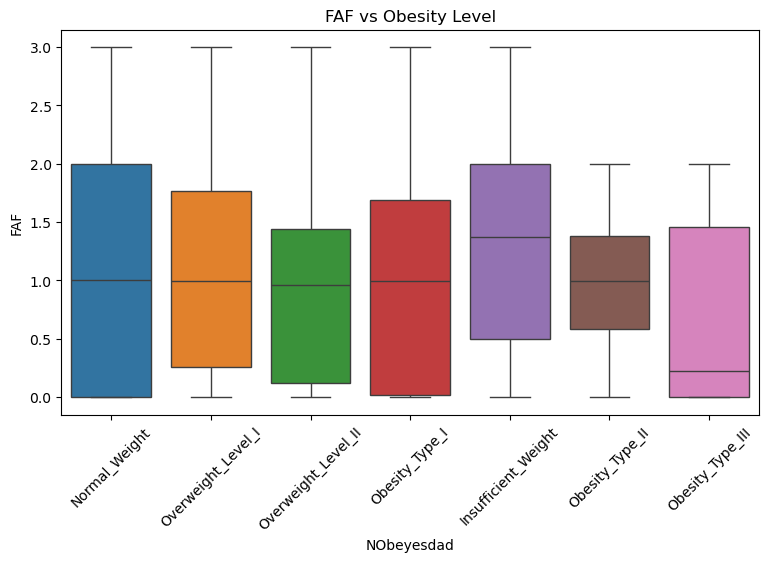

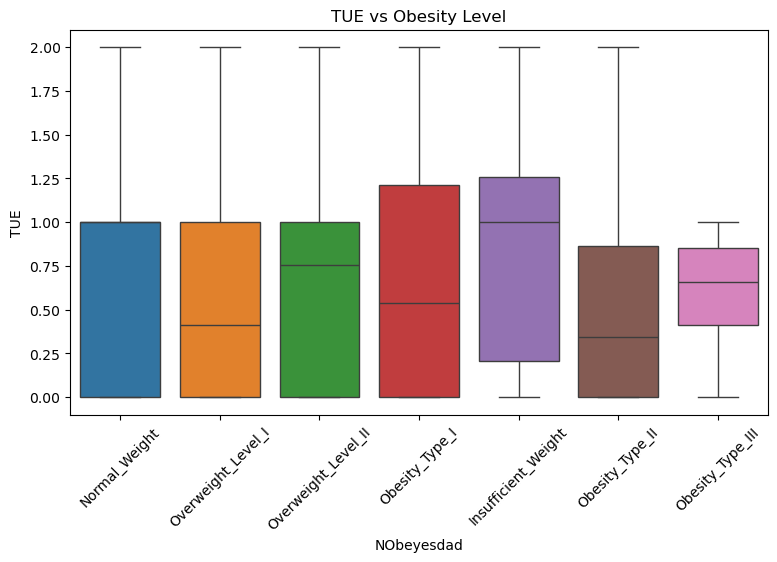

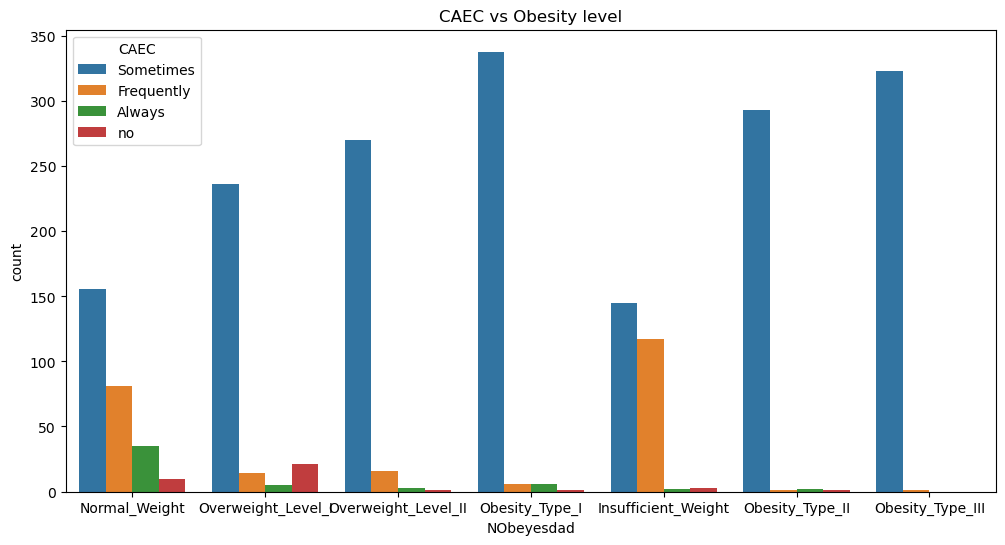

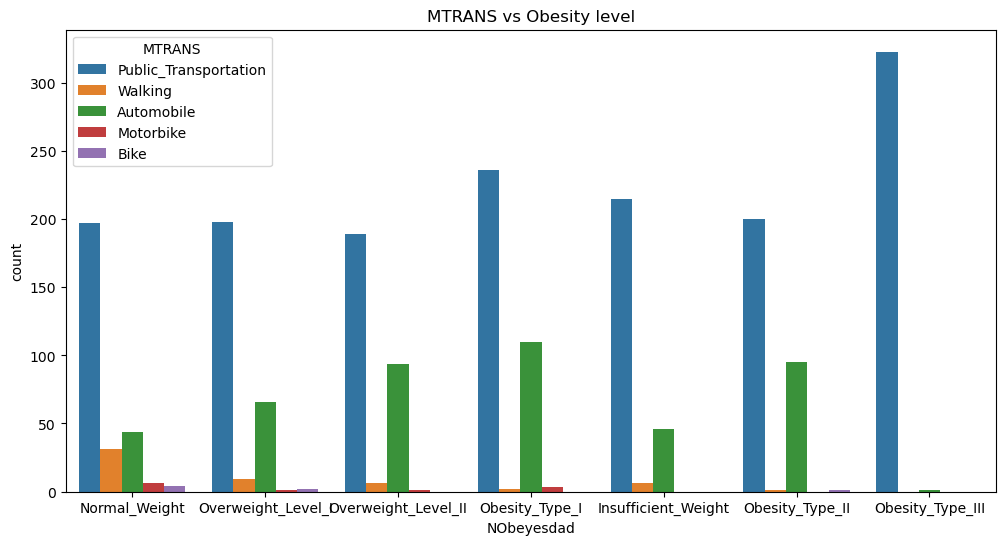

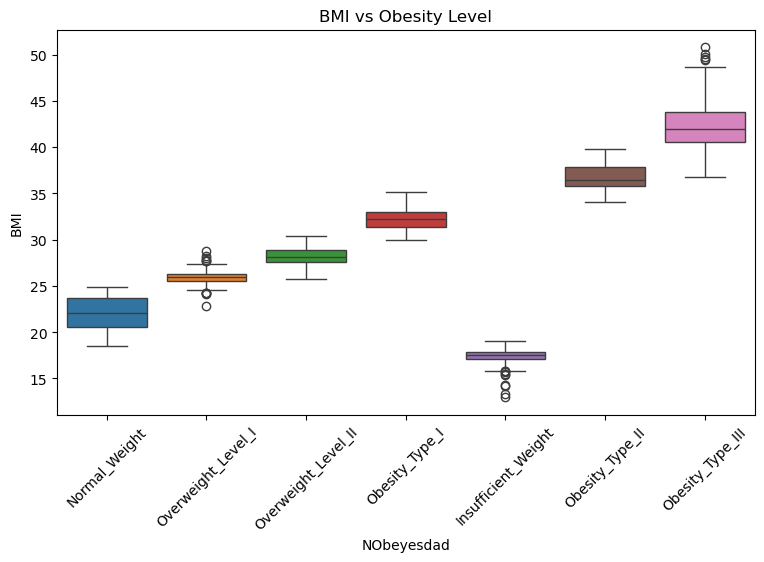

In [11]:
# Find the Outliers
# Exploratory Data Analytics - EDA

# Create the Boxplot and Bar Chart
categories = df['NObeyesdad'].unique().tolist()
columns = [col for col in df.columns if col != 'NObeyesdad']
for col in columns:
    if df[col].dtype != 'object':
        plt.figure(figsize = (9, 5))
        sns.boxplot(x='NObeyesdad',y=col, data = df,  hue='NObeyesdad', palette='tab10')
        plt.title(f"{col} vs Obesity Level")
        plt.xticks(rotation = 45)
        plt.show()
    else:
        plt.figure(figsize = (12, 6))
        sns.countplot(x='NObeyesdad', data = df,  hue=col, palette='tab10')
        plt.title(f"{col} vs Obesity level")
        plt.show()

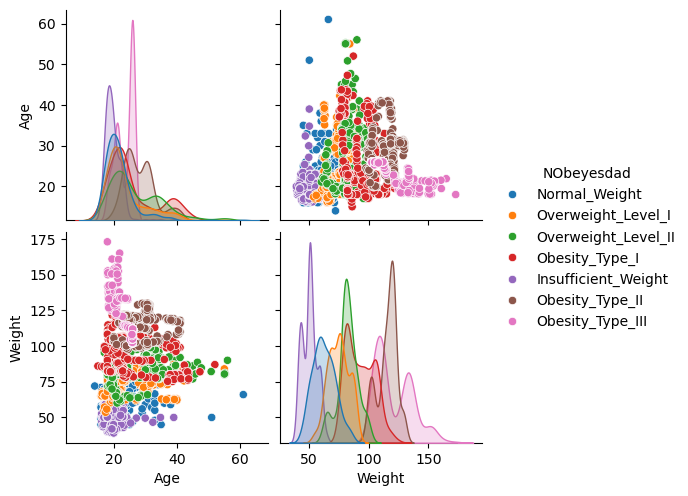

In [12]:
# The relationship between Age and Weight in the dataset.

sns.pairplot(data = df, vars = ["Age", "Weight"], hue = "NObeyesdad", palette = "tab10")
plt.show()

In [13]:
# Load the Dataset

new_df = df.copy()
new_df = new_df.drop(columns = ['BMI'])
print(new_df.shape)

(2087, 17)


In [14]:
# Preprocessing

label_encoders = {}
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col, le in label_encoders.items():
    mapping = {class_: index for index, class_ in enumerate(le.classes_)}
    print(f"{col} Mapping: {mapping}")

Gender Mapping: {'Female': 0, 'Male': 1}
family_history_with_overweight Mapping: {'no': 0, 'yes': 1}
FAVC Mapping: {'no': 0, 'yes': 1}
CAEC Mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE Mapping: {'no': 0, 'yes': 1}
SCC Mapping: {'no': 0, 'yes': 1}
CALC Mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS Mapping: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad Mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [15]:
# Feature scaling
# scaler = StandardScaler()
# Scale training and testing sets

scaler = StandardScaler()
columns_to_scale = ["Age", "Height", "Weight", "CH2O", "FAF", "TUE"]
new_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

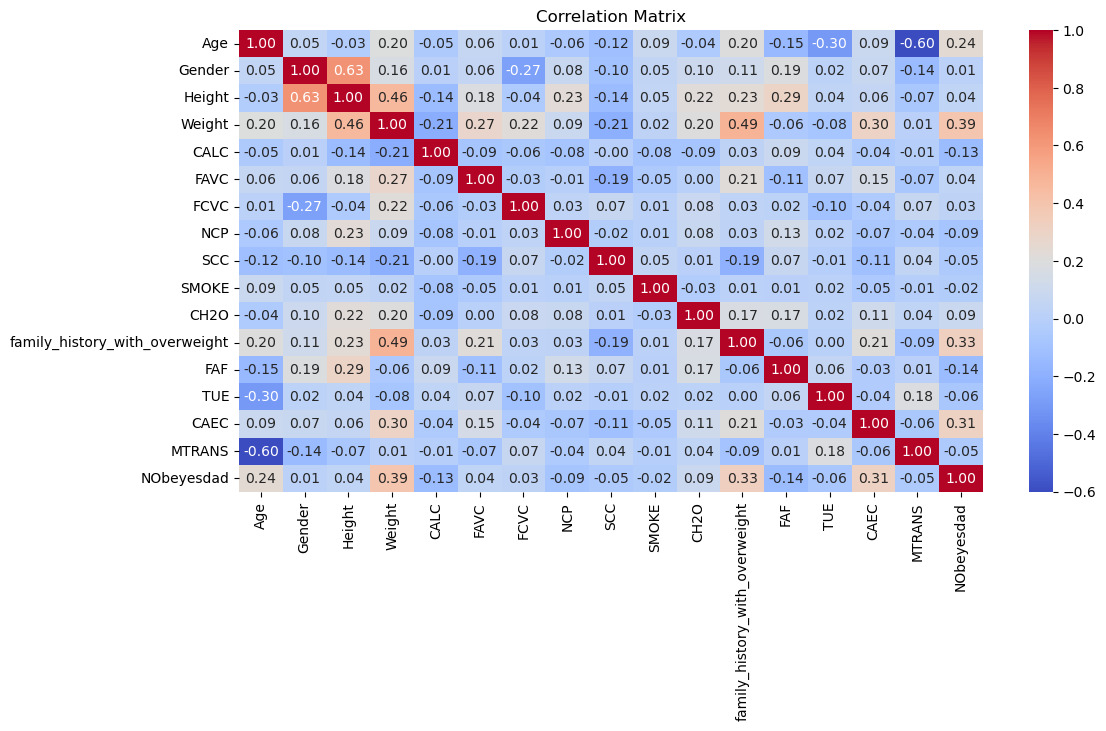

In [67]:
# Compute the correlation matrix
correlation_matrix = new_df.corr()
#print(correlation_matrix)

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Define features and target

X = new_df.drop(columns = ['NObeyesdad'])
y = new_df['NObeyesdad']

In [18]:
# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Display p-values
p_values_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='P-Value', ascending=True)
print("-------- Perform ANOVA F-test --------")
print(p_values_df)

-------- Perform ANOVA F-test --------
                           Feature      F-Score        P-Value
3                           Weight  1926.517611   0.000000e+00
1                           Gender   159.433043  6.852093e-167
11  family_history_with_overweight   145.743832  1.468826e-154
6                             FCVC   110.454307  3.796507e-121
14                            CAEC    77.546005   1.212147e-87
0                              Age    76.195373   3.246862e-86
5                             FAVC    43.204572   6.035625e-50
2                           Height    37.437653   2.518501e-43
4                             CALC    33.513167   8.980489e-39
15                          MTRANS    27.182901   2.354703e-31
7                              NCP    26.774811   7.132002e-31
8                              SCC    22.656834   5.345447e-26
12                             FAF    18.176809   1.155420e-20
10                            CH2O    15.187240   4.297247e-17
13              

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Train a Random Forest Classifier
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
def display_evaluation_result(name,y_pred,train_score,test_score):
    metrics = {
    "Test Score (%)": f"{test_score:.2f}",
    "Train Score (%)": f"{train_score:.2f}",
    "Accuracy Score": f"{accuracy_score(y_test, y_pred) * 100:.2f}",
    "Precision": f"{precision_score(y_test, y_pred, average='weighted')*100:.2f}",
    "Recall": f"{recall_score(y_test, y_pred, average='weighted')*100:.2f}",
    "F1-Score": f"{f1_score(y_test, y_pred, average='weighted')*100:.2f}",
    "Classification Report\n": classification_report(y_test, y_pred)}
    print(f"Model Evaluation Results: {name}")
    print("-"*30)
    for metric, value in metrics.items():
        print(f"{metric: <20}: {value}")

# Make Predictions
y_pred_randomforest = randomforest.predict(X_test)
train_score = randomforest.score(X_train, y_train) * 100
test_score = randomforest.score(X_test, y_test) * 100
display_evaluation_result("Random Forest",y_pred_randomforest,train_score,test_score)

Model Evaluation Results: Random Forest
------------------------------
Test Score (%)      : 96.89
Train Score (%)     : 100.00
Accuracy Score      : 96.89
Precision           : 97.07
Recall              : 96.89
F1-Score            : 96.91
Classification Report
:               precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.88      0.97      0.92        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.98      0.91      0.94        55
           6       0.94      1.00      0.97        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [22]:
#XGBOOST Model

xgb = XGBClassifier(random_state = 42) #Gradient Boosting (e.g., XGBoost)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
y_pred_xgb = xgb.predict(X_test)
train_score = xgb.score(X_train, y_train) * 100
test_score = xgb.score(X_test, y_test) * 100
display_evaluation_result("XGBoost",y_pred_xgb,train_score,test_score)

Model Evaluation Results: XGBoost
------------------------------
Test Score (%)      : 97.37
Train Score (%)     : 100.00
Accuracy Score      : 97.37
Precision           : 97.40
Recall              : 97.37
F1-Score            : 97.38
Classification Report
:               precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.90      0.93      0.92        61
           2       1.00      0.99      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.96      0.95      0.95        55
           6       0.98      1.00      0.99        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [24]:
# Decision Tree
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred_dt = dt.predict(X_test)
train_score = dt.score(X_train, y_train) * 100
test_score = dt.score(X_test, y_test) * 100
display_evaluation_result("Decision Tree",y_pred_dt,train_score,test_score)

Model Evaluation Results: Decision Tree
------------------------------
Test Score (%)      : 92.11
Train Score (%)     : 100.00
Accuracy Score      : 92.11
Precision           : 92.06
Recall              : 92.11
F1-Score            : 92.02
Classification Report
:               precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.83      0.74      0.78        61
           2       0.93      0.96      0.94        70
           3       1.00      0.97      0.98        64
           4       0.98      1.00      0.99        60
           5       0.81      0.85      0.83        55
           6       0.96      0.96      0.96        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



In [26]:
# Logistic Regression model

logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [27]:
# Predict and Evaluate

y_pred_logreg = logreg.predict(X_test)
train_score = logreg.score(X_train, y_train) * 100
test_score = logreg.score(X_test, y_test) * 100
display_evaluation_result("Logistic Regression",y_pred_dt,train_score,test_score)

Model Evaluation Results: Logistic Regression
------------------------------
Test Score (%)      : 86.36
Train Score (%)     : 89.28
Accuracy Score      : 92.11
Precision           : 92.06
Recall              : 92.11
F1-Score            : 92.02
Classification Report
:               precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.83      0.74      0.78        61
           2       0.93      0.96      0.94        70
           3       1.00      0.97      0.98        64
           4       0.98      1.00      0.99        60
           5       0.81      0.85      0.83        55
           6       0.96      0.96      0.96        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



In [28]:
svc = SVC(random_state = 42)
svc.fit(X_train,y_train)

SVC(random_state=42)

In [29]:
# Make Predictions

y_pred_svc = svc.predict(X_test)
train_score = svc.score(X_train, y_train) * 100
test_score = svc.score(X_test, y_test) * 100
display_evaluation_result("SVM",y_pred_svc,train_score,test_score)

Model Evaluation Results: SVM
------------------------------
Test Score (%)      : 89.95
Train Score (%)     : 92.81
Accuracy Score      : 89.95
Precision           : 90.16
Recall              : 89.95
F1-Score            : 89.95
Classification Report
:               precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.85      0.75      0.80        61
           2       0.97      0.97      0.97        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.75      0.76      0.76        55
           6       0.77      0.90      0.83        49

    accuracy                           0.90       418
   macro avg       0.89      0.90      0.89       418
weighted avg       0.90      0.90      0.90       418



[86.36363636363636, 92.10526315789474, 96.88995215311004, 97.36842105263158, 89.95215311004785]


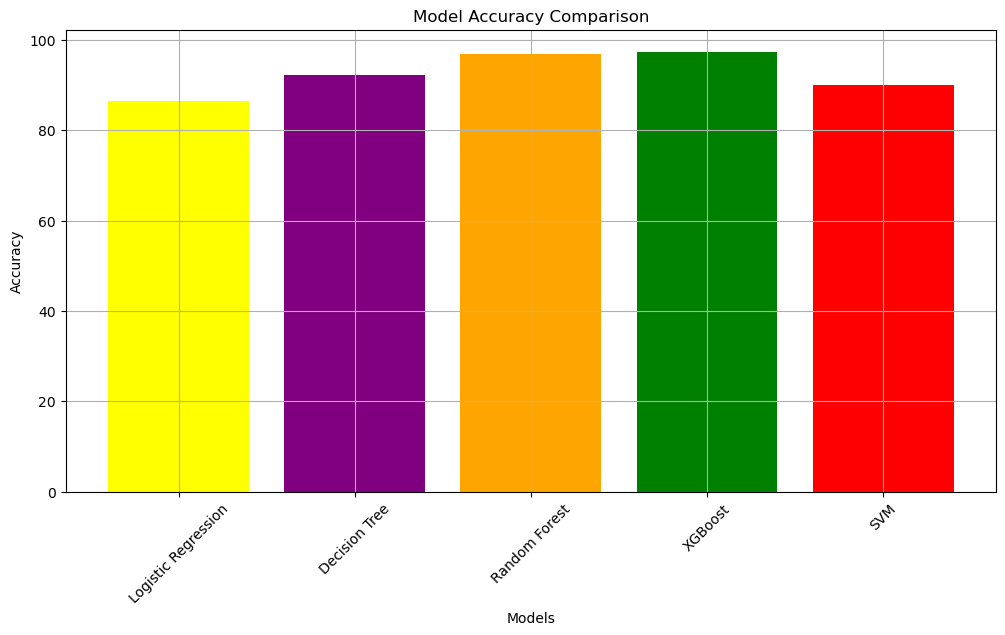

In [30]:
model_names = ['Logistic Regression','Decision Tree','Random Forest', 'XGBoost',
    'SVM'
]

accuracies = [
    accuracy_score(y_test, y_pred_logreg) * 100,
    accuracy_score(y_test, y_pred_dt) * 100,
    accuracy_score(y_test, y_pred_randomforest) * 100,
    accuracy_score(y_test, y_pred_xgb) * 100,
    accuracy_score(y_test, y_pred_svc) * 100,

]
print(accuracies)

# Plot model comparison
plt.figure(figsize = (12, 6))
plt.bar(model_names, accuracies, color = ['yellow', 'purple', 'orange', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [31]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_results = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='accuracy')

# Display Cross-Validation Results
print(f"Cross-Validation Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results)}")
print(f"Standard Deviation: {np.std(cv_results)}")

Cross-Validation Scores: [0.85628743 0.88023952 0.88622754 0.86227545 0.87987988]
Mean Accuracy: 0.8729819639999281
Standard Deviation: 0.011567505165967796


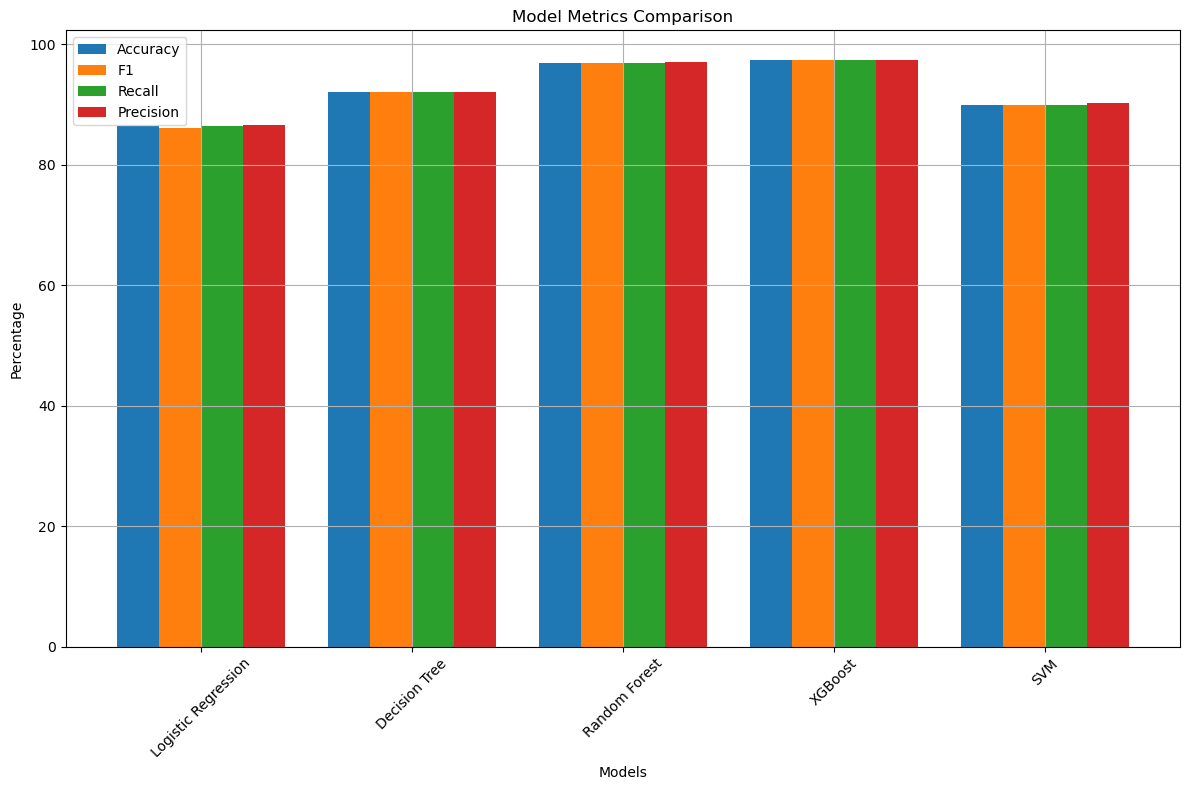

In [32]:
metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_logreg) * 100,
        'F1': f1_score(y_test, y_pred_logreg, average='weighted') * 100,
        'Recall': recall_score(y_test, y_pred_logreg, average='weighted') * 100,
        'Precision': precision_score(y_test, y_pred_logreg, average='weighted') * 100
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, y_pred_dt) * 100,
        'F1': f1_score(y_test, y_pred_dt, average='weighted') * 100,
        'Recall': recall_score(y_test, y_pred_dt, average='weighted') * 100,
        'Precision': precision_score(y_test, y_pred_dt, average='weighted') * 100
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_randomforest) * 100,
        'F1': f1_score(y_test, y_pred_randomforest, average='weighted') * 100,
        'Recall': recall_score(y_test, y_pred_randomforest, average='weighted') * 100,
        'Precision': precision_score(y_test, y_pred_randomforest, average='weighted') * 100
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, y_pred_xgb) * 100,
        'F1': f1_score(y_test, y_pred_xgb, average='weighted') * 100,
        'Recall': recall_score(y_test, y_pred_xgb, average='weighted') * 100,
        'Precision': precision_score(y_test, y_pred_xgb, average='weighted') * 100
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, y_pred_svc) * 100,
        'F1': f1_score(y_test, y_pred_svc, average='weighted') * 100,
        'Recall': recall_score(y_test, y_pred_svc, average='weighted') * 100,
        'Precision': precision_score(y_test, y_pred_svc, average='weighted') * 100
    }
}

# Plotting
model_names = list(metrics.keys())
metrics_names = ['Accuracy', 'F1', 'Recall', 'Precision']

plt.figure(figsize=(12, 8))
bar_width = 0.2
x = range(len(model_names))

# Plot each metric
for i, metric in enumerate(metrics_names):
    values = [metrics[model][metric] for model in model_names]
    plt.bar([p + bar_width * i for p in x], values, bar_width, label=metric)

plt.title("Model Metrics Comparison")
plt.ylabel("Percentage")
plt.xlabel("Models")
plt.xticks([p + 1.5 * bar_width for p in x], model_names, rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

In [33]:
# input_data = pd.DataFrame([[29 # Age
#                             ,0 # Gender
#                             ,1.7 # Height
#                             ,90 # Weight
#                             ,2 # CALC - Alcohol
#                             ,0 # FAVC - High calorie food
#                             ,3 # FCVC - Eat Veg
#                             ,2 # NCP - How many main meals
#                             ,0 # SCC - Monitor Calorie
#                             ,0 # Smoke 
#                             ,2 # CH2O
#                             ,1 # family history
#                             ,3 # FAF - Physical activities
#                             ,1 # TUE - Technology device
#                             ,2 # CAEC - food between meals
#                             ,0 #MTRANS - trasnportation
#                            ]],columns=['Age','Gender','Height','Weight','CALC','FAVC','FCVC','NCP','SCC','SMOKE','CH2O','family_history_with_overweight','FAF','TUE','CAEC','MTRANS'])
# input_bmi = input_data['Weight'] / (input_data['Height'] ** 2)
# print(input_bmi)
# predict_value = xgb.predict(input_data)
# print(predict_value)